In [1]:
import pandas as pd # voor dataprocessing, importeren csv file etc.
from sklearn.model_selection import train_test_split # voor het splitsen van train en testdata
from sklearn.preprocessing import StandardScaler
# de Decision Tree Regressor en optie om classifier om te zetten in dot_data:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics # om het model te evalueren
import numpy as np # voor het berekenen van squared
from sklearn.externals.six import StringIO # wordt gebruikt om een tijdelijke, virtuele file aan te maken
import pydotplus # voor het omzetten van de data uit een dot file in een graph
from IPython.display import Image # om de gegenereerde png file van de tree in jupyter te tonen

/home/shannen/Projects/Data_Science_Practice/venv/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [7]:
# Importeren dataset en printen van aantal rijen/kolommen, de eerste 5 records
# en verdere info zoals gemiddelde en std. deviatie
iris = pd.read_csv("iris.csv")
print(iris.shape)
print('\n')
print(iris.head())
print('\n')
print(iris.describe())

(150, 5)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
# Onderscheiden label en attributen
X = iris.drop(['petal_length', 'species'], axis=1)
y = iris['petal_length']

In [10]:
# Verdelen data in trainset/testset en tonen rijen/kolommen van iedere set en eerste 5 records van trainset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(105, 3)
(45, 3)


,sepal_length,sepal_width,petal_width
60,5.0,2.0,1.0
116,6.5,3.0,1.8
144,6.7,3.3,2.5
119,6.0,2.2,1.5
108,6.7,2.5,1.8


In [11]:
# Definiëren van het Regression Tree model en het fitten van de data
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
# De predictie van de petal_length van ieder sample in de testset volgens de getrainde regressor
y_pred = regressor.predict(X_test)
print(y_pred)

[5.6 4.1 1.3 6.  1.4 5.6 1.4 4.9 4.4 4.6 4.6 4.7 4.6 5.1 4.6 1.5 5.  4.
 1.4 1.7 5.  5.  1.6 1.3 4.9 1.4 1.5 4.6 3.5 1.5 5.5 5.  1.4 4.8 5.3 4.
 1.3 4.5 5.  3.9 5.2 1.6 5.4 1.7 1.7]


In [19]:
# Evalueren van het regressormodel
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
metrics.r2_score(y_test, y_pred) # R-squared

Mean Absolute Error: 0.28222222222222226
Mean Squared Error: 0.12599999999999997
Root Mean Squared Error: 0.35496478698597694


0.9540813021005802

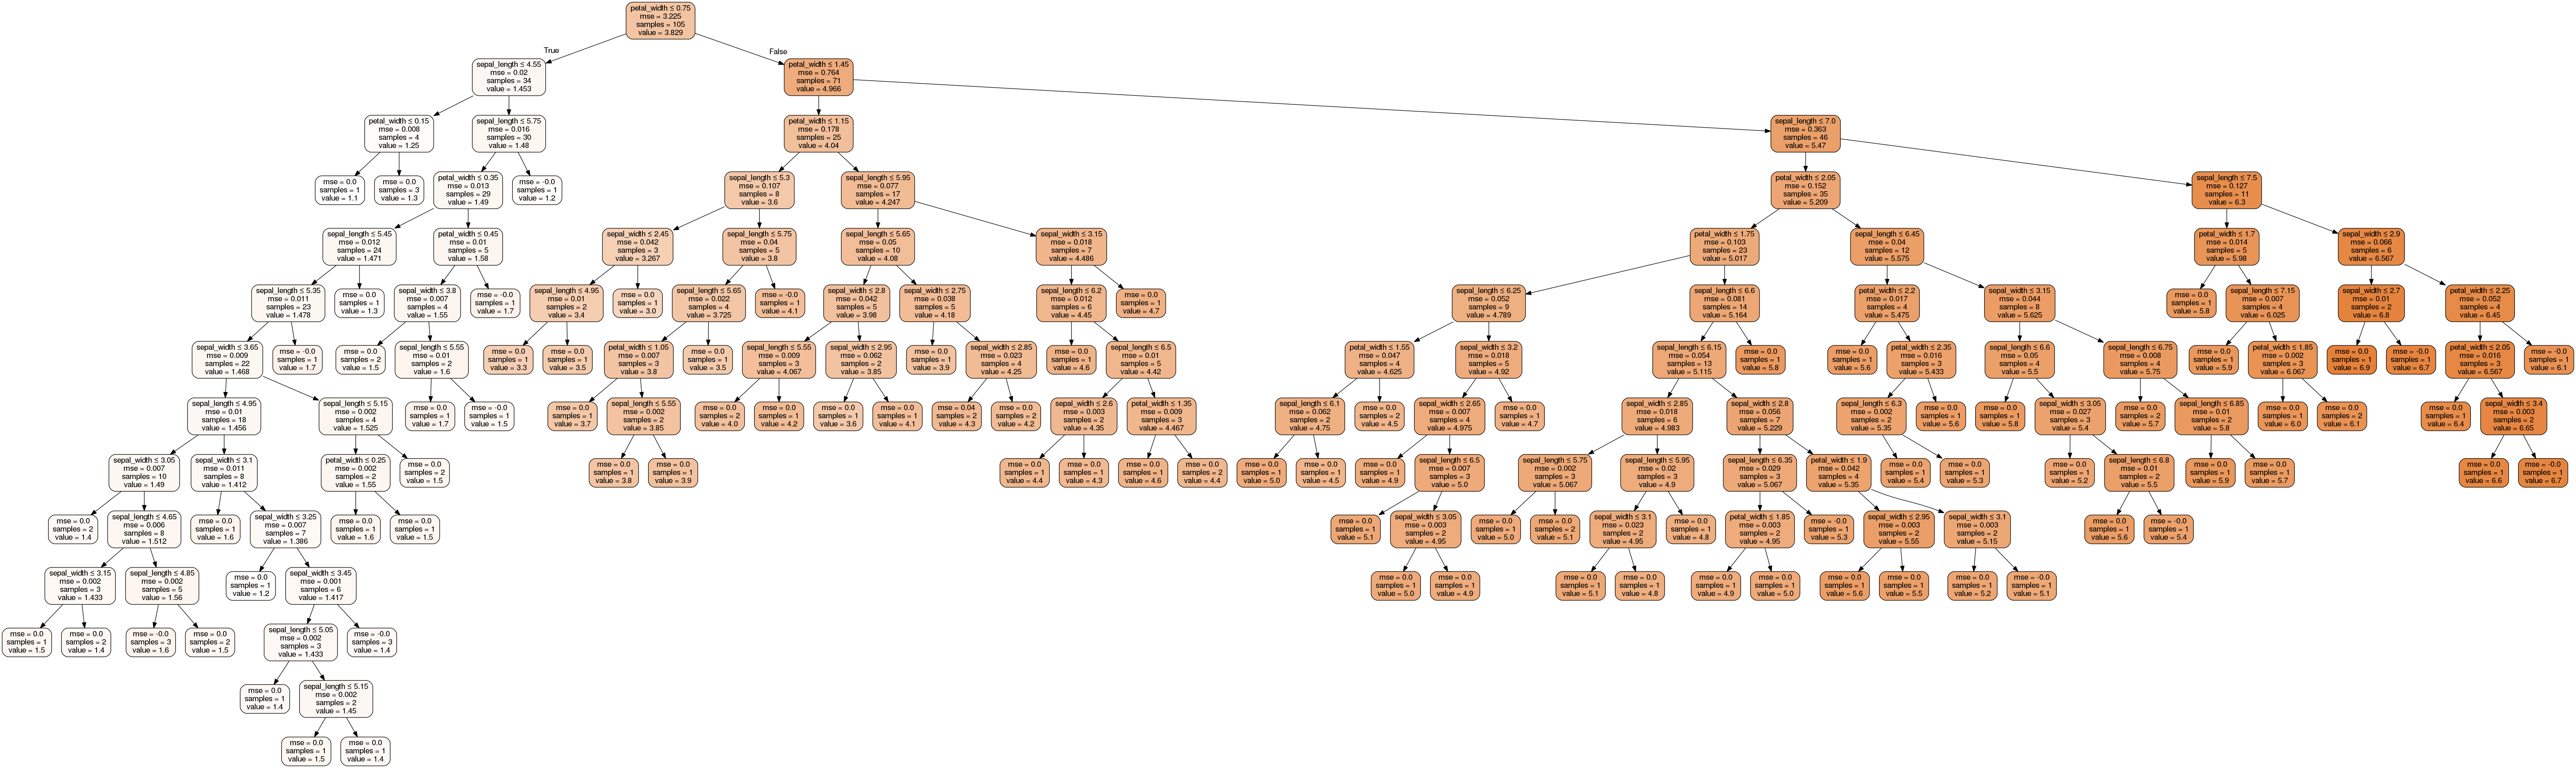

In [17]:
# Met StringIO wordt een tijdelijke file aangemaakt. De classifier wordt met behulp van export_graphviz omgezet in
# dot data (DOT is een taal om graphs mee te beschrijven). De dot data wordt met behulp van pydotplus omgezet in een
# graph. Deze wordt opgeslagen als PNG en in Jupyter getoond.
col_names = ['sepal_length','sepal_width','petal_width']
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names = col_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris_regression_tree.png')
Image(graph.create_png())

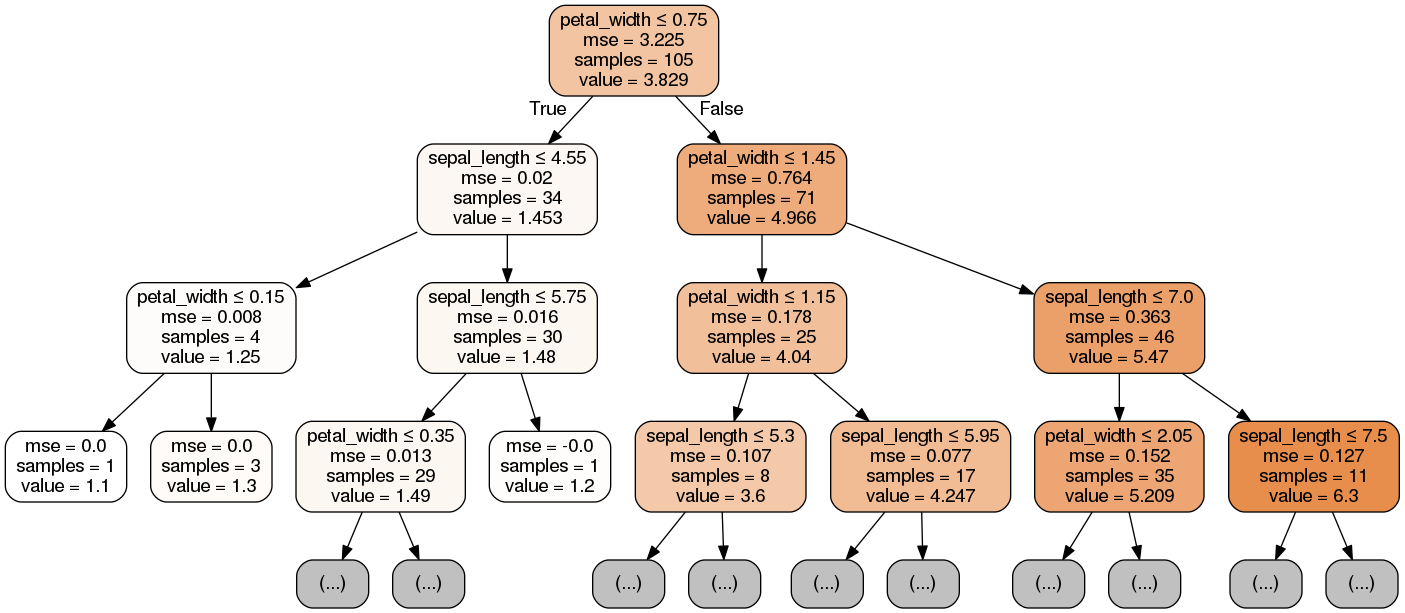

In [18]:
# Afbeelding kleinere boom. Met StringIO wordt een tijdelijke file aangemaakt. De classifier wordt met behulp van export_graphviz omgezet in
# dot data (DOT is een taal om graphs mee te beschrijven). De dot data wordt met behulp van pydotplus omgezet in een
# graph. Deze wordt opgeslagen als PNG en in Jupyter getoond.
col_names = ['sepal_length','sepal_width','petal_width']
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
               filled=True, rounded=True, max_depth=3,
               special_characters=True, feature_names = col_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris_regression_tree_small.png')
Image(graph.create_png())